# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

### **Plan for the Task**

Given the background information, the goal is to scrape, clean, analyze, and present customer feedback for British Airways. The objective is to extract actionable insights that can help BA improve customer satisfaction, reduce costs, and increase revenue.

---

### **Steps to Address the Task**

#### **Step 1: Scraping Data**
- Use web scraping tools like `BeautifulSoup` or APIs to collect customer feedback from third-party sources (e.g., review websites).
- Save the scraped data in a structured format (e.g., CSV).

---

#### **Step 2: Data Cleaning**
- **Remove noise**: Eliminate verification markers (`✅Trip Verified` or `Not Verified`).
- **Handle missing values**: Drop rows with empty reviews.
- **Remove duplicates**: Ensure only unique reviews are analyzed.
- **Normalize text**: Strip whitespace and make all text lowercase for consistency.

---

#### **Step 3: Sentiment Analysis**
- Use libraries like `TextBlob` or `VADER` to calculate the sentiment polarity of each review.
- Categorize sentiments into **Positive**, **Negative**, or **Neutral** based on polarity scores.

---

#### **Step 4: Insights Extraction**
- Analyze trends in sentiment across the dataset:
  - Identify frequent keywords or themes in positive and negative reviews (e.g., delays, customer service, food quality).
  - Understand the distribution of sentiments across all reviews.

---

#### **Step 5: Visualization**
- Create visualizations to present insights:
  - A **bar chart** showing the proportion of positive, negative, and neutral sentiments.
  - A **word cloud** highlighting commonly mentioned terms in reviews.
  - A **histogram** displaying the sentiment polarity distribution.

---

#### **Step 6: Business Recommendations**
- Based on the analysis:
  - Highlight areas BA is excelling in (e.g., "frequent mentions of polite staff in positive reviews").
  - Identify pain points (e.g., "frequent mentions of delays in negative reviews").
  - Provide actionable recommendations for improvement.





#### **Step 1: Scraping Data**
- Use web scraping tools like `BeautifulSoup` or APIs to collect customer feedback from third-party sources (e.g., review websites).
- Save the scraped data in a structured format (e.g., CSV).


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
import time
import os

In [5]:

# Base URL and parameters
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10  # Number of pages to scrape
page_size = 100  # Number of reviews per page

# List to store reviews
reviews = []

# Headers to mimic a real browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Loop through pages
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Construct the URL for the current page
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    try:
        # Send GET request
        response = requests.get(url, headers=headers)

        # Check for successful request
        if response.status_code == 200:
            # Parse the HTML content
            content = response.content
            parsed_content = BeautifulSoup(content, 'html.parser')

            # Extract reviews
            for para in parsed_content.find_all("div", {"class": "text_content"}):
                reviews.append(para.get_text(strip=True))

            print(f"   ---> {len(reviews)} total reviews collected so far")
        else:
            print(f"Failed to fetch page {i}. Status Code: {response.status_code}")

    except Exception as e:
        print(f"An error occurred while scraping page {i}: {e}")

    # Pause between requests to avoid being blocked
    time.sleep(2)


Scraping page 1
   ---> 100 total reviews collected so far
Scraping page 2
   ---> 200 total reviews collected so far
Scraping page 3
   ---> 300 total reviews collected so far
Scraping page 4
   ---> 400 total reviews collected so far
Scraping page 5
   ---> 500 total reviews collected so far
Scraping page 6
   ---> 600 total reviews collected so far
Scraping page 7
   ---> 700 total reviews collected so far
Scraping page 8
   ---> 800 total reviews collected so far
Scraping page 9
   ---> 900 total reviews collected so far
Scraping page 10
   ---> 1000 total reviews collected so far


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified| Very good flight following an e...
1,Not Verified| An hour's delay due to late arr...
2,✅Trip Verified| I booked through BA because ...
3,✅Trip Verified| British airways lost bags in...
4,✅Trip Verified| The check in process and rewar...


In [7]:
# Define the directory where you want to save the file
save_dir = r"C:\Users\SURFACE\Documents\A\Forage\British Airways Reviews"
os.makedirs(save_dir, exist_ok=True)  # Ensure the directory exists
csv_file = os.path.join(save_dir, "british_airways_reviews.csv")

# Save reviews to a CSV file
try:
    with open(csv_file, "w", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        writer.writerow(["Review"])
        for review in reviews:
            writer.writerow([review])
    print(f"Successfully saved {len(reviews)} reviews to {csv_file}")
except Exception as e:
    print(f"An error occurred while saving to CSV: {e}")


Successfully saved 1000 reviews to C:\Users\SURFACE\Documents\A\Forage\British Airways Reviews\british_airways_reviews.csv


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## **Step 2: Data Cleaning**
### Objectives:
- Remove unnecessary verification markers like ✅Trip Verified or Not Verified.
- Handle missing or null values.
- Remove duplicate reviews.
- Normalize text by trimming whitespaces and optionally converting text to lowercase.


In [8]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\SURFACE\Documents\A\Forage\British Airways Reviews\british_airways_reviews.csv"
data = pd.read_csv(file_path)

# Step 1: Remove verification markers
data['Cleaned_Review'] = data['Review'].str.replace(r"^(Not Verified\|?|✅Trip Verified\|?)", "", regex=True)

# Step 2: Drop rows with null reviews
data = data.dropna(subset=['Cleaned_Review'])

# Step 3: Remove duplicates
data = data.drop_duplicates(subset=['Cleaned_Review'])

# Step 4: Trim whitespace and normalize text
data['Cleaned_Review'] = data['Cleaned_Review'].str.strip()

# Optional: Convert text to lowercase for uniformity
data['Cleaned_Review'] = data['Cleaned_Review'].str.lower()

# Display cleaned dataset
# To display the first few rows of the cleaned dataset
print(data.head())

# Save the cleaned DataFrame to a valid path
output_path = r"C:\Users\SURFACE\Documents\A\Forage\British Airways Reviews\cleaned_reviews.csv"
data.to_csv(output_path, index=False)
print(f"File successfully saved to: {output_path}")




                                              Review  \
0  Not Verified|  Very good flight following an e...   
1  Not Verified|  An hour's delay due to late arr...   
2  ✅Trip Verified|   I booked through BA because ...   
3  ✅Trip Verified|   British airways lost bags in...   
4  ✅Trip Verified| The check in process and rewar...   

                                      Cleaned_Review  
0  very good flight following an equally good fli...  
1  an hour's delay due to late arrival of the inc...  
2  i booked through ba because loganair don’t hav...  
3  british airways lost bags in lhr then found th...  
4  the check in process and reward/loyalty progra...  
File successfully saved to: C:\Users\SURFACE\Documents\A\Forage\British Airways Reviews\cleaned_reviews.csv


### **Step 3: Sentiment Analysis**

#### **Objectives**:
1. Use sentiment analysis to classify reviews into **Positive**, **Negative**, or **Neutral** categories.
2. Use `TextBlob` for calculating sentiment polarity scores.

---

### **Sentiment Analysis Process**
1. **Calculate Polarity Scores**:
   - Polarity ranges from `-1` (very negative) to `1` (very positive).
2. **Classify Sentiments**:
   - Positive: Polarity > 0
   - Negative: Polarity < 0
   - Neutral: Polarity = 0


In [9]:
from textblob import TextBlob

# Step 1: Define a function to calculate polarity
def analyze_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

# Step 2: Apply the function to calculate polarity for each review
data['Sentiment_Score'] = data['Cleaned_Review'].apply(analyze_sentiment)

# Step 3: Classify sentiment based on polarity score
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Sentiment_Score'].apply(classify_sentiment)

# Save the results to a CSV file
output_path = r"C:\Users\SURFACE\Documents\A\Forage\British Airways Reviews\sentiment_analysis_results.csv"
data.to_csv(output_path, index=False)
print(f"Sentiment analysis results saved to: {output_path}")

# Optionally, display the first few rows in the console
print(data.head())


Sentiment analysis results saved to: C:\Users\SURFACE\Documents\A\Forage\British Airways Reviews\sentiment_analysis_results.csv
                                              Review  \
0  Not Verified|  Very good flight following an e...   
1  Not Verified|  An hour's delay due to late arr...   
2  ✅Trip Verified|   I booked through BA because ...   
3  ✅Trip Verified|   British airways lost bags in...   
4  ✅Trip Verified| The check in process and rewar...   

                                      Cleaned_Review  Sentiment_Score  \
0  very good flight following an equally good fli...         0.344286   
1  an hour's delay due to late arrival of the inc...         0.122222   
2  i booked through ba because loganair don’t hav...         0.078906   
3  british airways lost bags in lhr then found th...        -0.066667   
4  the check in process and reward/loyalty progra...        -0.308333   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Negative  
4  Negative  


### **Step 4: Insights Extraction**

In this step, we'll analyze the results of the sentiment analysis to uncover key insights about customer feedback. This includes understanding the distribution of sentiments and identifying commonly mentioned keywords or themes.

---

### **Steps for Insights Extraction**

#### **1. Sentiment Distribution**
- Analyze the proportion of Positive, Negative, and Neutral reviews.
- Helps identify the overall customer sentiment.

#### **2. Identify Key Themes (Optional)**
- Use word frequency analysis or word clouds to find frequently mentioned terms in Positive and Negative reviews.
- Focus on areas like delays, service quality, or specific flight experiences.

#### **3. Time-Based Trends (Optional)**
- If timestamp data is available, analyze how sentiment trends change over time (e.g., before and after specific events like service updates).

---

### **Python Code for Insights Extraction**

#### **Step 1: Sentiment Distribution**


In [10]:
import matplotlib.pyplot as plt

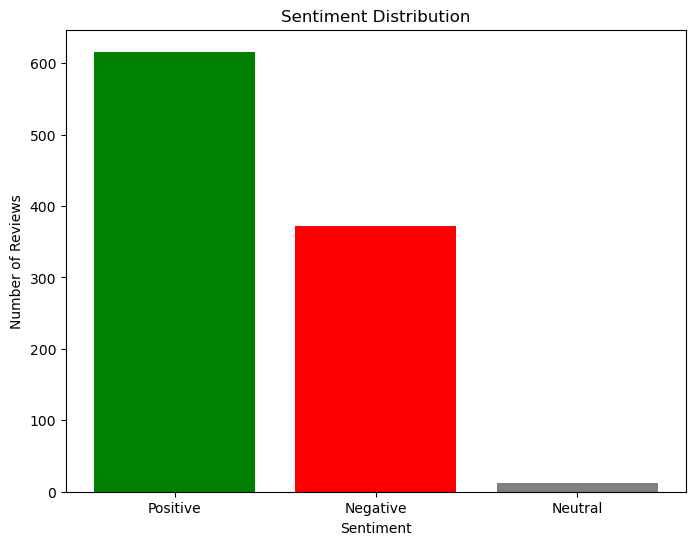

Sentiment Distribution:
Sentiment
Positive    616
Negative    372
Neutral      12
Name: count, dtype: int64


In [11]:

# Count sentiment categories
sentiment_counts = data['Sentiment'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Print distribution in the console
print("Sentiment Distribution:")
print(sentiment_counts)




#### **Step 2: Frequently Mentioned Keywords**
(Optional: This step requires additional libraries.)




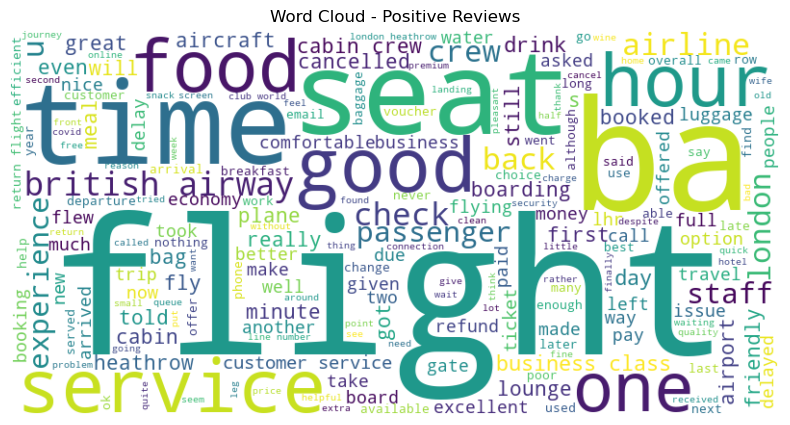

In [16]:
from wordcloud import WordCloud

# Combine reviews by sentiment
positive_reviews = " ".join(data[data['Sentiment'] == 'Positive']['Cleaned_Review'])
negative_reviews = " ".join(data[data['Sentiment'] == 'Negative']['Cleaned_Review'])

# Generate word clouds for Positive and Negative reviews
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.show()




### **Optional: Time-Based Sentiment Trends**
If your dataset has a `Date` column, you can analyze sentiment trends over time.



In [ ]:

# Convert Date column to datetime format (if available)
data['Date'] = pd.to_datetime(data['Date'])

# Group by month or year and calculate sentiment counts
sentiment_trends = data.groupby(data['Date'].dt.to_period('M'))['Sentiment'].value_counts().unstack()

# Plot the sentiment trends
sentiment_trends.plot(kind='line', figsize=(10, 6))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()

### **Step 5: Other Visualization**



#### **Sentiment Polarity Distribution**


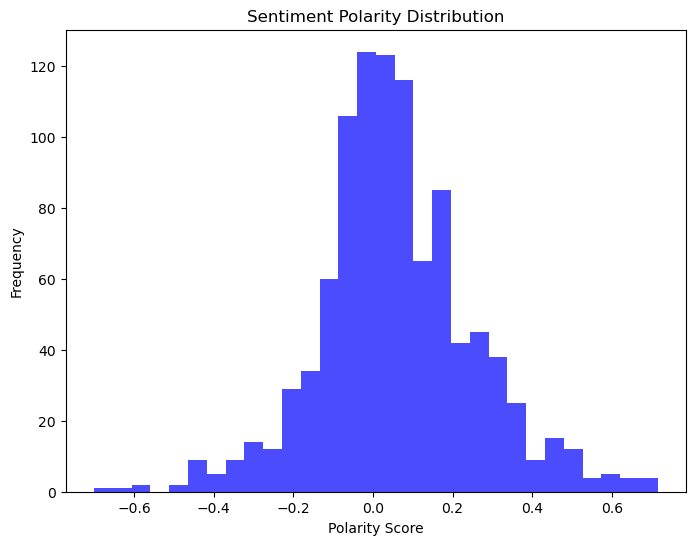

In [20]:

# Plot sentiment polarity histogram
plt.figure(figsize=(8, 6))
data['Sentiment_Score'].plot(kind='hist', bins=30, color='blue', alpha=0.7)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()
